Import Libraries

In [46]:
import pandas as pd
import numpy as np
from matplotlib.pylab import plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score



In [40]:

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Import Dataset

In [107]:
df=pd.read_csv('WELFake_Dataset.csv' )
df=df. iloc[:-50000,:]   #Drop 50k rows just to minimize size of dataset for quick model training.
                          #You can manage dataset your own way according to your PC storage

In [108]:
df.shape

(22134, 4)

In [109]:
df.describe()

,Unnamed: 0,label
count,22134.000000,22134.000000
mean,11066.500000,0.519698
std,6389.679765,0.499623
min,0.000000,0.000000
25%,5533.250000,0.000000
50%,11066.500000,1.000000
75%,16599.750000,1.000000
max,22133.000000,1.000000


Preprocessing

In [110]:
df.isnull().sum()

Unnamed: 0      0
title         137
text           11
label           0
dtype: int64

In [111]:
df.label
print(f'Ratio of real and fake news:')
df['label'].value_counts()

Ratio of real and fake news:


1    11503
0    10631
Name: label, dtype: int64

In [112]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [113]:
df.isnull().sum()

title    137
text      11
label      0
dtype: int64

In [114]:
df=df.fillna(' ')

In [115]:
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [116]:
df["content"] = df["title"]+ " " +df["text"]

In [117]:
df.drop(columns=['title','text'],inplace=True)

In [118]:
df.head(3)

,label,content
0,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1,1,Did they post their votes for Hillary already?
2,1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...


In [119]:
df['content'][20796]

'27 Photos That Prove The Earth Is in Serious Danger & It’s Time To Be Worried Now We Are Change \nOften times we are blind to what is happening around us. Just because we cannot see the effects of pollution and over-stripping the Earth of her resources in our own backyards, doesn’t mean that it isn’t a very serious concern. Closing our eyes to these issues is not going to help the problems go away. The world used to be an absolutely beautiful place, but that beauty is slowly being pushed out by the trash of mankind. We are consuming more than what this Earth can handle and pretty soon the Earth will no longer be able to sustain mankind. Here are 27 pictures that will open your eyes to the serious danger that our very existence is in.\nH/T Jill Stein & Unreal-Lists \nPlease remember to subscribe To We Are Change and stay up to date with daily Videos.\n\nFollow WE ARE CHANGE on SOCIAL MEDIA SnapChat: LukeWeAreChange \nfbook: https://facebook.com/LukeWeAreChange \nTwitter: https://twitte

Stemming

In [76]:
#Stemming
ps= PorterStemmer()

def Stemming(content):
  stemmed_content =re.sub('[^a-zA-Z]',' ',content)
  stemmed_content =stemmed_content.lower()
  stemmed_content =stemmed_content.split()
  stemmed_content =[ps.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content =" ".join (stemmed_content)
  return stemmed_content



In [77]:
df['content']=df['content'].apply(Stemming)

Model Selection

In [78]:
#Model Selection
X=df['content'].values
y=df['label'].values

In [79]:
vector= TfidfVectorizer()
vector.fit(X)
X=vector.transform(X)

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, stratify=y ,random_state=5)

Random Forest Classifier

In [82]:
#RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred_rfc=rfc.predict(X_test)
accuracy_score(y_test,y_pred_rfc)

0.9071606053761012

Logistic Regression

In [89]:
lr= LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.9247797605601987

**XGBoost Classifier**

In [128]:
import xgboost as xgb
xgb_classifier= xgb.XGBClassifier()
xgb_classifier.fit(X_train,y_train)
y_pred1=xgb_classifier.predict(X_test)
accuracy_score(y_test,y_pred1)

0.9561779986446803

In [131]:
score=cross_val_score(xgb_classifier,X_train,y_train,cv=5)
score.mean()

0.9541428464589448

Confusion Matrix

<Axes: >

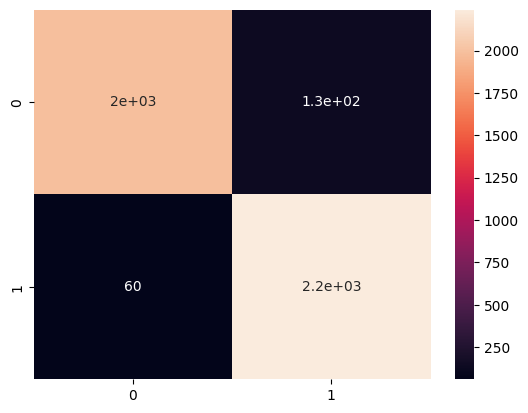

In [129]:
#Confusion Matrix
cm=confusion_matrix(y_test,y_pred1)
sns.heatmap(cm,annot=True)

Classification Report

In [130]:
#Classification Report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      2126
           1       0.94      0.97      0.96      2301

    accuracy                           0.96      4427
   macro avg       0.96      0.96      0.96      4427
weighted avg       0.96      0.96      0.96      4427



**As XGBoost giving Higher accuracy as compared to other models so XGBoost will be our proposed Model**

Predictive System

In [133]:
input_data=X_test[2]
prediction=xgb_classifier.predict(input_data)
if prediction[0] == 1:
  print('Fake News')
else:
  print('Real News')

Real News
